In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [5]:
COVID_econ_df = pd.read_csv("COVID_econ.csv")

The correlation between cases and SP500 closing price is -0.09
The correlation between cases and SP500 volume is -0.34
The correlation between cases and Dow_Jones_Industrial_Average closing price is -0.11
The correlation between cases and Dow_Jones_Industrial_Average volume is -0.55
The correlation between cases and NASDAQ closing price is -0.03
The correlation between cases and NASDAQ volume is -0.59
The correlation between cases and Russell2000 closing price is -0.27
The correlation between cases and Russell2000 volume is -0.34


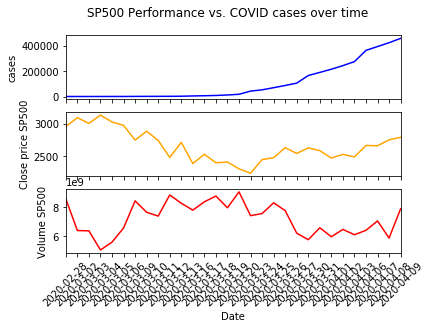

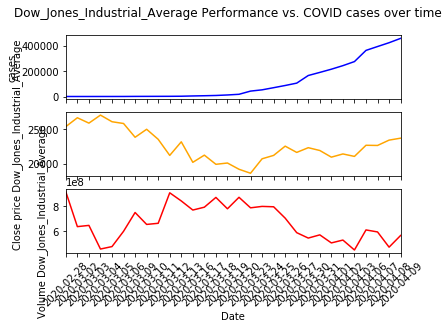

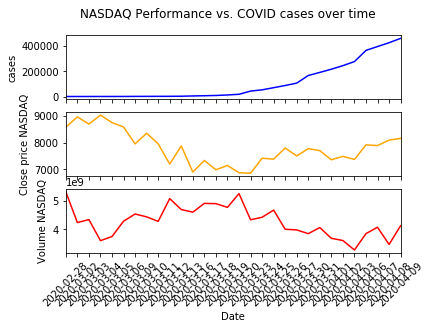

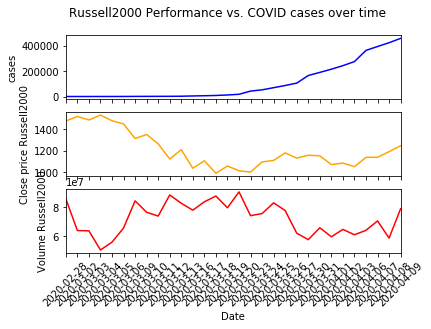

In [12]:
indicators = ["SP500", "Dow_Jones_Industrial_Average", "NASDAQ", "Russell2000"]

for indicator in indicators:
    fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
    fig.suptitle(f"{indicator} Performance vs. COVID cases over time")

    ax1.plot(COVID_econ_df["Date"], COVID_econ_df["Total Cases"], color="blue")
    ax1.set_ylabel("cases")

    ax2.plot(COVID_econ_df["Date"], COVID_econ_df[f"Close_{indicator}"], color="orange")
    ax2.set_ylabel(f"Close price {indicator}")

    ax3.plot(COVID_econ_df["Date"], COVID_econ_df[f"Volume_{indicator}"], color="red")
    ax3.set_ylabel(f"Volume {indicator}")

    plt.xlim(min(COVID_econ_df["Date"]), max(COVID_econ_df["Date"]))
    plt.xlabel("Date")
    plt.xticks(rotation=45)
    
    correlation = sts.pearsonr(COVID_econ_df["Total Cases"], COVID_econ_df[f"Close_{indicator}"])
    correlation2 = sts.pearsonr(COVID_econ_df["Total Cases"], COVID_econ_df[f"Volume_{indicator}"])
    
    print(f"The correlation between cases and {indicator} closing price is {round(correlation[0],2)}")
    print(f"The correlation between cases and {indicator} volume is {round(correlation2[0],2)}")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text xticklabel objects>)

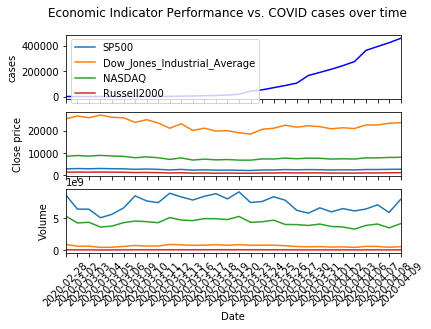

In [7]:
indicators = ["SP500", "Dow_Jones_Industrial_Average", "NASDAQ", "Russell2000"]


fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle(f"Economic Indicator Performance vs. COVID cases over time")

ax1.plot(COVID_econ_df["Date"], COVID_econ_df["Total Cases"], color="blue")
ax1.set_ylabel("cases")

for indicator in indicators:
    ax2.plot(COVID_econ_df["Date"], COVID_econ_df[f"Close_{indicator}"], label=f"{indicator}")
    ax2.set_ylabel("Close price")
    ax2.legend(loc="upper left", bbox_to_anchor=(0,2.225))

    ax3.plot(COVID_econ_df["Date"], COVID_econ_df[f"Volume_{indicator}"], label=f"{indicator}")
    ax3.set_ylabel("Volume")

plt.xlim(min(COVID_econ_df["Date"]), max(COVID_econ_df["Date"]))
plt.xlabel("Date")
plt.xticks(rotation=45)

In [3]:
construction_unemployment_rate_df = pd.read_csv("construction_unemployment_rate.csv")
construction_unemployment_rate_df.corr()

,Unnamed: 0,Total Construction,Total Residential construction,Total Nonresidential construction,Total Private construction,Total Public construction,Unemployment Rate for 16yo and over,Unemployment Rate for Men 16yo and over,Unemployment Rate for Women 16yo and over,Unemployment Rate for White people 16yo and over,...,Unemployment Rate for Hispanic people 16yo and over,Unemployment Rate for 25yo and older with less than High School Diploma,Unemployment Rate for 25yo and older with High School Degree,Unemployment Rate for 25yo and older with some college,Unemployment Rate for 25yo and older with Bachelor's degree or higher,Unemployment Rate for 16-24yo,Unemployment Rate for 25-34yo,Unemployment Rate for 35-44yo,Unemployment Rate for 45-54yo,Unemployment Rate for 55yo and over
Unnamed: 0,1.000000,-0.287823,-0.402171,0.106052,-0.272000,-0.049420,0.187851,0.140192,0.259503,0.150789,...,0.171810,0.144758,0.205957,0.264024,0.282876,0.224793,0.194466,0.156482,0.188423,0.254891
Total Construction,-0.287823,1.000000,0.889934,0.556076,0.992277,-0.201423,-0.940439,-0.909379,-0.970738,-0.928377,...,-0.925043,-0.920066,-0.927951,-0.948766,-0.933698,-0.950626,-0.923808,-0.913105,-0.942701,-0.951936
Total Residential construction,-0.402171,0.889934,1.000000,0.115800,0.928654,-0.539277,-0.888348,-0.875611,-0.890300,-0.881757,...,-0.903413,-0.884842,-0.883076,-0.889459,-0.887825,-0.900238,-0.881445,-0.868074,-0.880732,-0.895709
Total Nonresidential construction,0.106052,0.556076,0.115800,1.000000,0.468696,0.544065,-0.429253,-0.384820,-0.491681,-0.414996,...,-0.368271,-0.391274,-0.411665,-0.445364,-0.415526,-0.429770,-0.405613,-0.406669,-0.448059,-0.440878
Total Private construction,-0.272000,0.992277,0.928654,0.468696,1.000000,-0.321369,-0.959174,-0.936073,-0.976584,-0.950839,...,-0.952944,-0.945712,-0.949364,-0.961355,-0.947230,-0.965282,-0.945515,-0.935743,-0.959565,-0.966085
Total Public construction,-0.049420,-0.201423,-0.539277,0.544065,-0.321369,1.000000,0.394720,0.449418,0.300894,0.420980,...,0.463056,0.443943,0.412584,0.348372,0.351868,0.365187,0.413823,0.418364,0.380537,0.361522
Unemployment Rate for 16yo and over,0.187851,-0.940439,-0.888348,-0.429253,-0.959174,0.394720,1.000000,0.994636,0.986644,0.998130,...,0.991503,0.989551,0.992279,0.988684,0.986163,0.989361,0.993226,0.993399,0.995278,0.987932
Unemployment Rate for Men 16yo and over,0.140192,-0.909379,-0.875611,-0.384820,-0.936073,0.449418,0.994636,1.000000,0.965163,0.996738,...,0.989833,0.987751,0.989188,0.976343,0.976726,0.979790,0.990662,0.993231,0.988979,0.975631
Unemployment Rate for Women 16yo and over,0.259503,-0.970738,-0.890300,-0.491681,-0.976584,0.300894,0.986644,0.965163,1.000000,0.978851,...,0.972608,0.970556,0.976743,0.986806,0.980259,0.983216,0.976660,0.972283,0.984189,0.986695
Unemployment Rate for White people 16yo and over,0.150789,-0.928377,-0.881757,-0.414996,-0.950839,0.420980,0.998130,0.996738,0.978851,1.000000,...,0.992387,0.989708,0.990801,0.982742,0.980590,0.985659,0.991648,0.993661,0.993304,0.983560


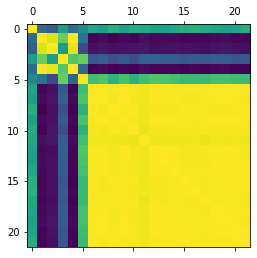

In [4]:
plt.matshow(construction_unemployment_rate_df.corr())